<Figure size 1000x600 with 0 Axes>

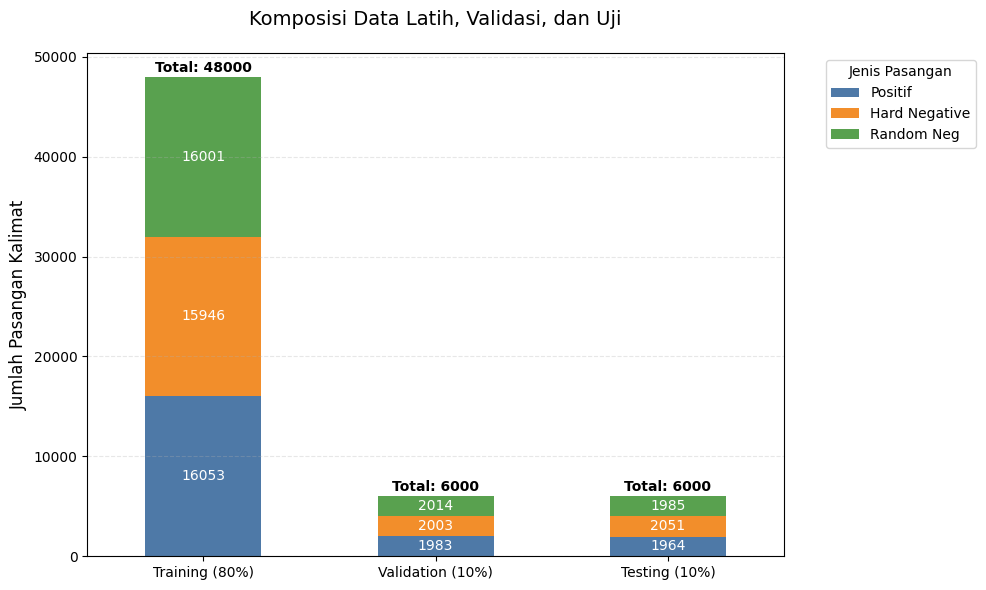

Grafik tersimpan: grafik_profil_data_clean.png

=== TABEL RINCIAN DATA (Untuk Naskah) ===
Kategori          Positif  Hard Negative  Random Neg
Dataset                                             
Training (80%)      16053          15946       16001
Validation (10%)     1983           2003        2014
Testing (10%)        1964           2051        1985


In [3]:
# ================= CELL: VISUALISASI PROFIL DATA BAB 4 =================
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# 1. Load Data Master (yang masih punya kolom 'origin_strategy')
input_file = "..\Dataset\DATASET_SKRIPSI_FINAL_60K.csv"
df = pd.read_csv(input_file, encoding='utf-8-sig')

# 2. Ulangi Logika Split (Agar sama persis dengan file training)
df['stratify_col'] = df['score'].round().astype(int)

# Split 80:20
train_df, temp_df = train_test_split(
    df, test_size=0.2, stratify=df['stratify_col'], random_state=42
)
# Split 10:10
val_df, test_df = train_test_split(
    temp_df, test_size=0.5, stratify=temp_df['stratify_col'], random_state=42
)

# 3. Siapkan Data untuk Grafik
# Kita beri label dataset
train_df['Dataset'] = 'Training (80%)'
val_df['Dataset'] = 'Validation (10%)'
test_df['Dataset'] = 'Testing (10%)'

# Gabung kembali hanya untuk keperluan plotting
df_plot = pd.concat([train_df, val_df, test_df])

# Rename strategi agar lebih pendek di grafik
strategy_map = {
    'Positif (Mining)': 'Positif',
    'Hard Negative (Mining)': 'Hard Negative',
    'Random (Mining)': 'Random Neg'
}
df_plot['Kategori'] = df_plot['origin_strategy'].map(strategy_map)

# Hitung jumlah
data_counts = df_plot.groupby(['Dataset', 'Kategori']).size().reset_index(name='Jumlah')

# Urutkan urutan dataset di grafik
dataset_order = ['Training (80%)', 'Validation (10%)', 'Testing (10%)']
data_counts['Dataset'] = pd.Categorical(data_counts['Dataset'], categories=dataset_order, ordered=True)

# --- 4. PLOT GRAFIK (STACKED BAR) ---
plt.figure(figsize=(10, 6))

# Gunakan pivot untuk format stacked bar
pivot_df = data_counts.pivot(index='Dataset', columns='Kategori', values='Jumlah')
# Reorder kolom
pivot_df = pivot_df[['Positif', 'Hard Negative', 'Random Neg']]

# Plot
ax = pivot_df.plot(kind='bar', stacked=True, color=['#4e79a7', '#f28e2b', '#59a14f'], figsize=(10, 6))

plt.title('Komposisi Data Latih, Validasi, dan Uji', fontsize=14, pad=20)
plt.xlabel('')
plt.ylabel('Jumlah Pasangan Kalimat', fontsize=12)
plt.xticks(rotation=0)
plt.legend(title='Jenis Pasangan', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.3)

# Tambahkan label angka di tengah bar
for c in ax.containers:
    ax.bar_label(c, label_type='center', color='white', fontsize=10, fmt='%d')

# Tambahkan total di atas bar
totals = pivot_df.sum(axis=1)
for i, total in enumerate(totals):
    ax.text(i, total + 500, f"Total: {int(total)}", ha='center', weight='bold')

plt.tight_layout()
plt.savefig("grafik_profil_data_clean.png", dpi=300)
plt.show()

print("Grafik tersimpan: grafik_profil_data_clean.png")

# Tampilkan Tabel Angka untuk Naskah
print("\n=== TABEL RINCIAN DATA (Untuk Naskah) ===")
print(pivot_df)